In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


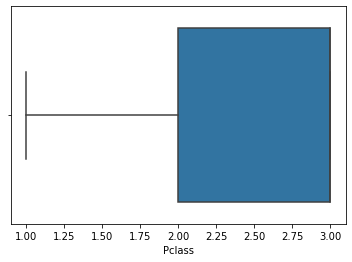

In [6]:
sns.boxplot(x='Pclass',data=df)

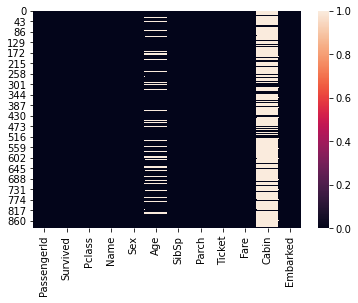

In [5]:
sns.heatmap(df.isnull())

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

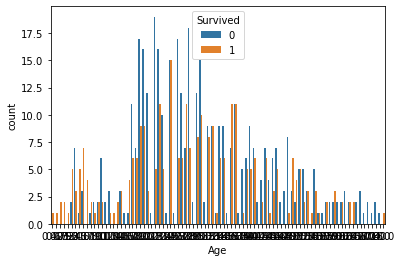

In [7]:
sns.countplot(df['Age'],hue=df['Survived'])

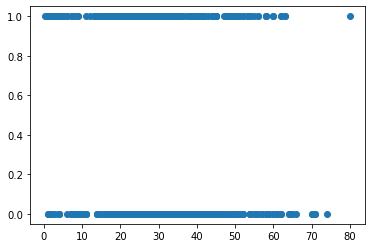

In [8]:
plt.scatter(df['Age'],df['Survived'])

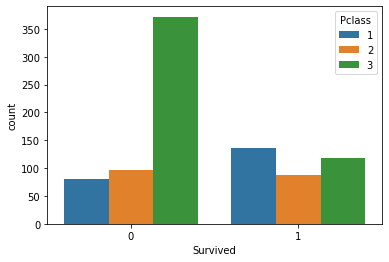

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=df)

## More number of people in Pclass 3 had died while more numer of people in Pclass 1 has survived. Thought there is not much difference in the survival1 of Pclass1 and Pclass3

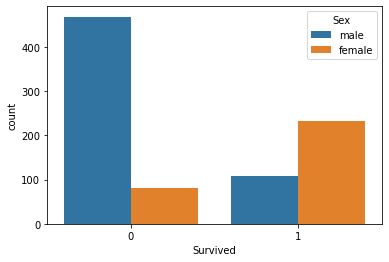

In [10]:
sns.countplot(x='Survived',hue='Sex',data=df)

## More male died while more female survived

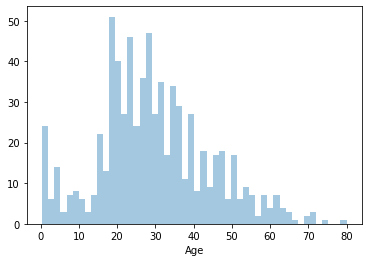

In [11]:
sns.distplot(df['Age'].dropna(),kde=False,bins=50)

## More number of people were mostly in the range 18 to 32 years

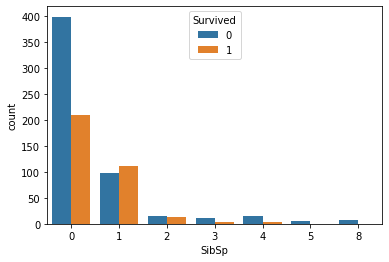

In [12]:
sns.countplot(x='SibSp',hue='Survived',data=df)

## More number of people had survived as well as died with SibSp 0. All people with SibSp 5 and 6  had died

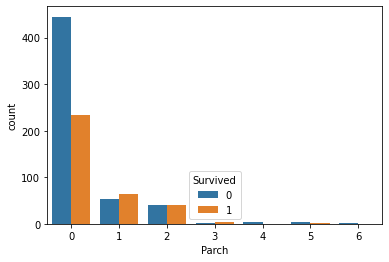

In [13]:
sns.countplot(x='Parch',hue='Survived',data=df)

## So we can see that in both Parch and SibSp, More number of 0 class died as well as survived. On the other hand,  class 1 had more number of people survived then dead in Parch as well as SibSp

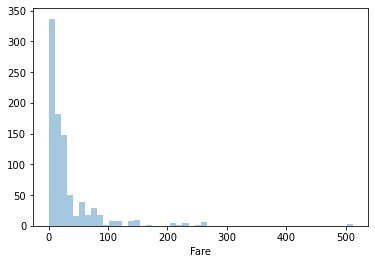

In [14]:
sns.distplot(df['Fare'],kde=False)

# Data Cleaning

In [15]:
df.corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


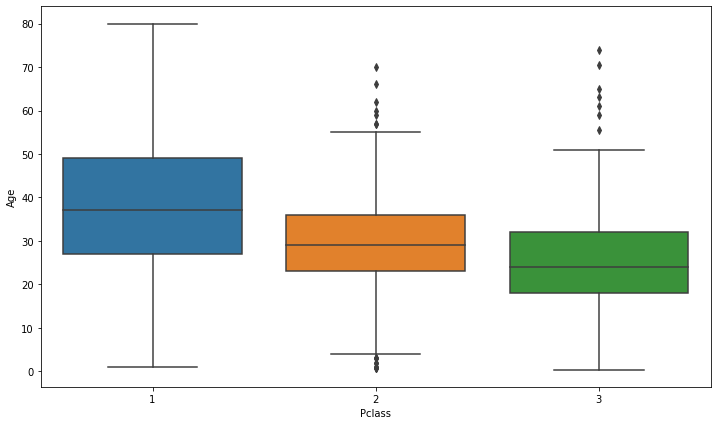

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [20]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

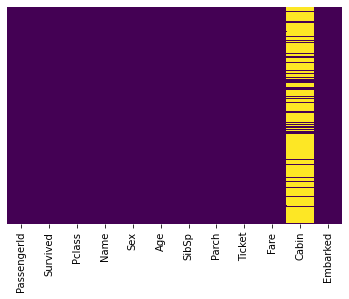

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

# Categorical Features

### Now we will convert our categorical features into dummies so that our ml model can interpret it correctly

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [25]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [26]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [28]:
df=pd.concat([df,sex,embark],axis=1)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.081658,0.007763
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
male,0.042939,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Q,-0.033606,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
S,0.022148,-0.155660,0.081720,0.007763,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


## Train Test Split

In [31]:
df.drop(['Survived'],axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.3,random_state=101)

In [38]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [52]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
predictions=lr.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)

In [43]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7686567164179104

In [55]:
RCF=RandomForestClassifier()
RCF.fit(X_train,y_train)
predictions=RCF.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc=confusion_matrix(y_test,predictions)
acc
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8395522388059702

In [49]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [50]:
predictions=svm.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
acc=confusion_matrix(y_test,predictions)
acc
from sklearn.metrics import confusion_matrix,accuracy_score
acc=confusion_matrix(y_test,predictions)
acc
accuracy=accuracy_score(y_test,predictions)
accuracy


0.6044776119402985

In [51]:
nn=MLPClassifier()
nn.fit(X_train,y_train)
predictions=nn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
acc=confusion_matrix(y_test,predictions)
acc
from sklearn.metrics import confusion_matrix,accuracy_score
acc=confusion_matrix(y_test,predictions)
acc
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7052238805970149

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       154
           1       0.89      0.71      0.79       114

    accuracy                           0.84       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.85      0.84      0.84       268



In [57]:
test=pd.read_csv('testt.csv')

In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
RCF=RandomForestClassifier()
